In [7]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table, join, unique, vstack

Found 3813 unique bricks
Found 3468 unique bricks with ELG targets


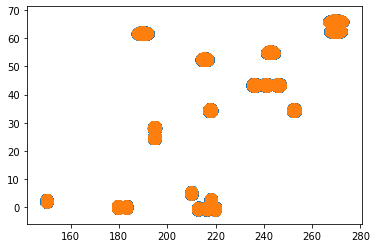

In [8]:
dirname = '/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS'
targets = Table.read(os.path.join(dirname,'dark_targets.fits'))
print('Found {:d} unique bricks'.format(np.unique(targets['BRICKNAME']).size))
targets_ELG = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2/ELG_HIP_full.dat.fits')
print('Found {:d} unique bricks with ELG targets'.format(np.unique(targets_ELG['BRICKNAME']).size))
plt.scatter(targets['RA'],targets['DEC'],marker='.')
plt.scatter(targets_ELG['RA'],targets_ELG['DEC'],marker='.')

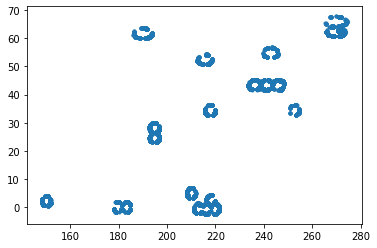

In [9]:
mask = ~np.isin(targets['BRICKNAME'],targets_ELG['BRICKNAME'])
plt.scatter(targets['RA'][mask],targets['DEC'][mask],marker='.')

In [10]:
print(np.unique(targets_ELG['PHOTSYS']))

PHOTSYS
-------
      N
      S


In [11]:
index,counts = np.unique(targets_ELG['BRICKNAME'],return_counts=True)
print(np.median(counts))

113.0


In [12]:
from desiutil.brick import Bricks
table = Bricks().to_table()

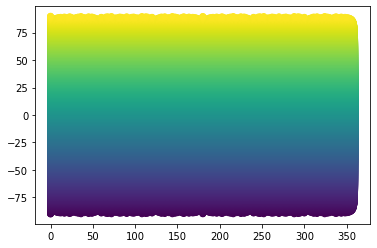

In [13]:
plt.scatter(table['RA1'],table['DEC1'],c=table['BRICKROW'])

In [17]:
fn = '/global/cscratch1/sd/adematti/legacysim/dr9/SV3_density3300/north/file0_rs0_skip0/injected.fits'
#fn = '/global/cscratch1/sd/adematti/legacysim/dr9/SV3/north/file0_rs0_skip0/injected_randoms.fits'
injected = Table.read(fn)

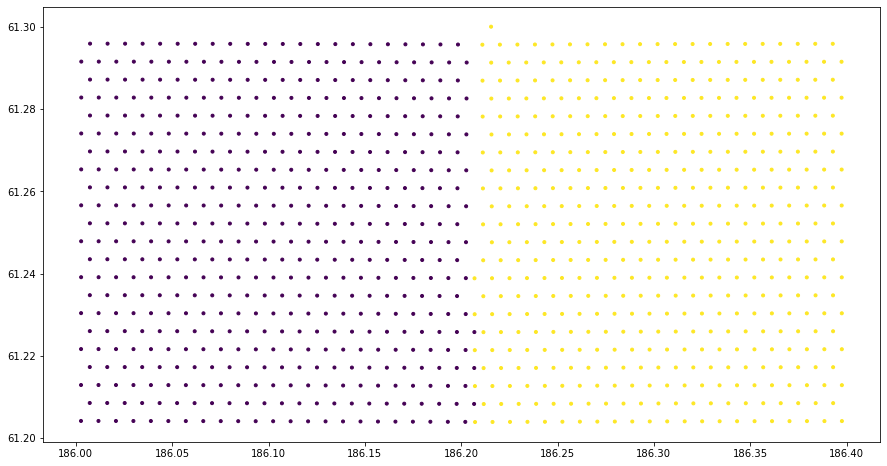

In [18]:
plt.figure(figsize=(15,8))
mask = injected['brickname'] != 0 #== injected['brickname'][0]
unique,index,inverse = np.unique(injected['brickname'],return_index=True,return_inverse=True)
brickid = index[inverse]
mask = (injected['ra'] > 186.0) & (injected['ra'] < 186.4)
mask &= (injected['dec'] > 61.2) & (injected['dec'] < 61.3)
#mask[:] = True
plt.scatter(injected['ra'][mask],injected['dec'][mask],marker='.',c=brickid[mask])

In [20]:
injected.columns

<TableColumns names=('bx','by','ra','dec','id','brickname','photsys','objid','g','r','z','gfiber','rfiber','zfiber','shape_r','sersic','shape_ba','shape_phi','hsc_object_id','hsc_demp_photoz_best','hsc_mizuki_photoz_best','mw_transmission_g','flux_g','mw_transmission_r','flux_r','mw_transmission_z','flux_z','shape_e1','shape_e2','seed')>

In [21]:
#print(np.unique(injected['seed']),np.unique(injected['id']))
#print(np.quantile(injected['shape_r'],q=0.99))

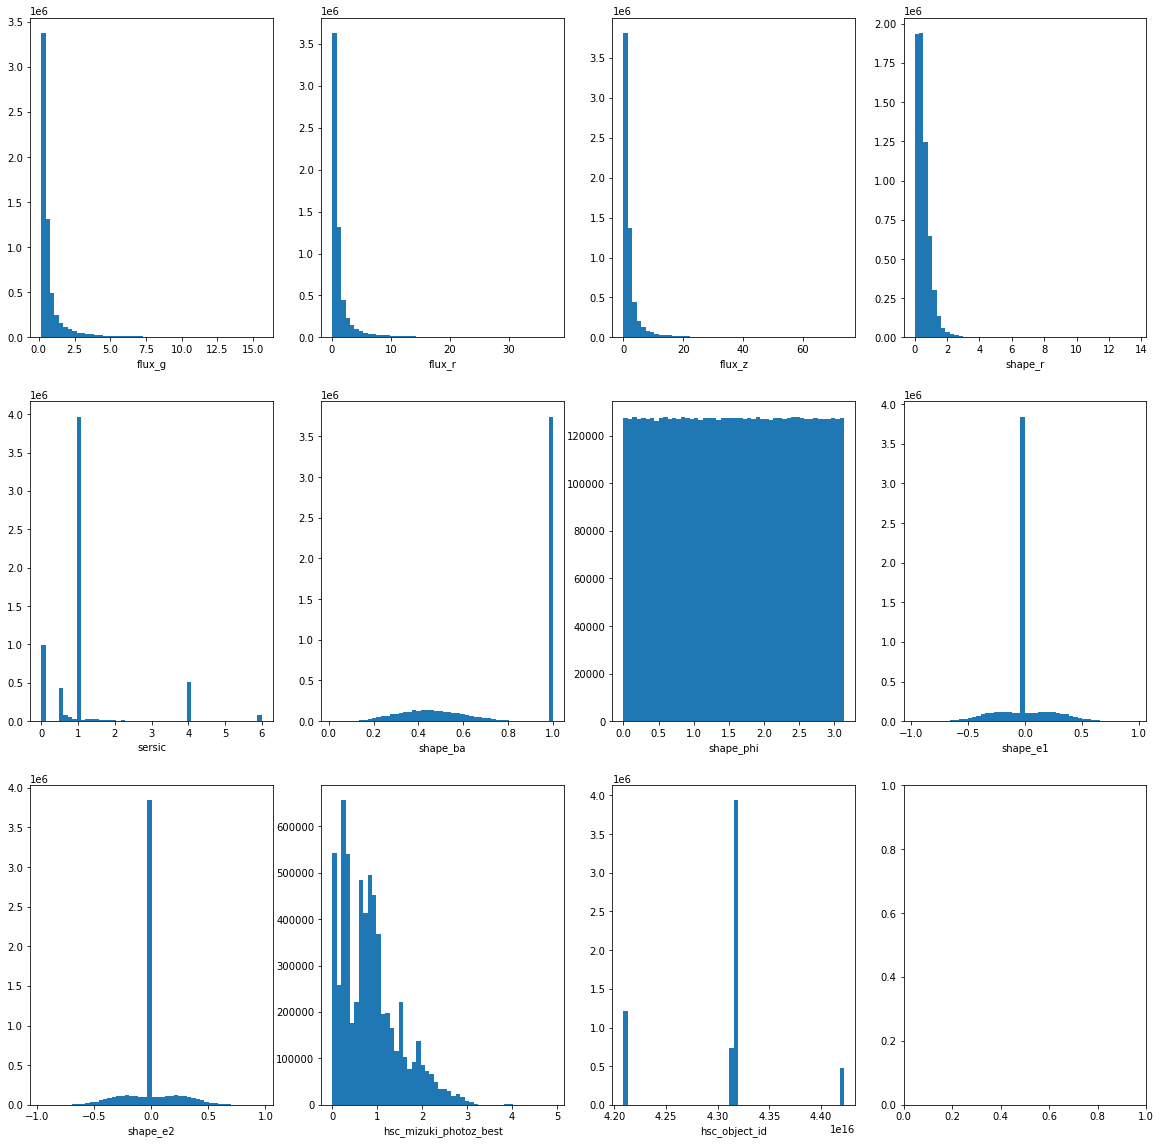

In [22]:
keys = ['flux_g','flux_r','flux_z','shape_r','sersic','shape_ba','shape_phi','shape_e1','shape_e2','hsc_mizuki_photoz_best','hsc_object_id']
fig,lax = plt.subplots(ncols=4,nrows=3,sharex=False,sharey=False,figsize=(20,20))
lax = lax.flatten()
for key,ax in zip(keys,lax):
    ax.hist(injected[key],bins=50)
    ax.set_xlabel(key)

Selected fraction is  0.1207587847895604


Text(0, 0.5, '$g-r$')

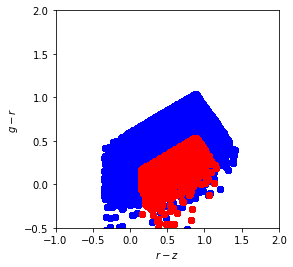

In [23]:
from photometry import utils
from preprocess import isELG_colors, custom_imaging_mask

masks = isELG_colors(**{'%sflux' % b:utils.mag_to_flux(injected[b]) for b in ['g','r','z','gfiber']})
mask = masks[0] | masks[1]
print('Selected fraction is ',mask.sum()*1./mask.size)
fig,ax = plt.subplots(ncols=1,nrows=1,sharex=False,sharey=False,figsize=(4,4))
ax.scatter(injected['r'] - injected['z'],injected['g'] - injected['r'],color='b')
ax.scatter(injected['r'][mask] - injected['z'][mask],injected['g'][mask] - injected['r'][mask],color='r')
ax.set_xlim(-1.,2.)
ax.set_ylim(-0.5,2.)
ax.set_xlabel('$r-z$')
ax.set_ylabel('$g-r$')

1.0
1.0


(array([2.70900e+04, 9.39600e+03, 3.86935e+05, 2.05729e+05, 1.08879e+05,
        2.28000e+04, 7.11900e+03, 5.36000e+02, 0.00000e+00, 3.39000e+02]),
 array([0.       , 0.393    , 0.786    , 1.179    , 1.572    , 1.965    ,
        2.358    , 2.751    , 3.144    , 3.5370002, 3.93     ],
       dtype=float32),
 <a list of 10 Patch objects>)

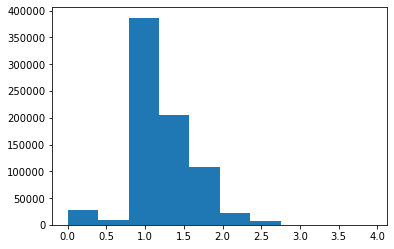

In [24]:
print(np.sum(injected['hsc_object_id'] > 0)*1./len(injected))
print(np.sum(injected['hsc_object_id'][mask] > 0)*1./mask.sum())
plt.hist(injected['hsc_mizuki_photoz_best'][mask])

In [25]:
#fn = '/global/cscratch1/sd/adematti/legacysim/dr9/SV3/north/file0_rs0_skip0/injected.fits'
#injected = Table.read(fn)
#injected = injected[::36]
#fn = '/global/cscratch1/sd/adematti/legacysim/dr9/SV3_100/north/file0_rs0_skip0/injected.fits'
#utils.mkdir('/global/cscratch1/sd/adematti/legacysim/dr9/SV3_100/north/file0_rs0_skip0/')
#injected.write(fn,format='fits',overwrite=True)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/astropy/table/column.py:1020: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)


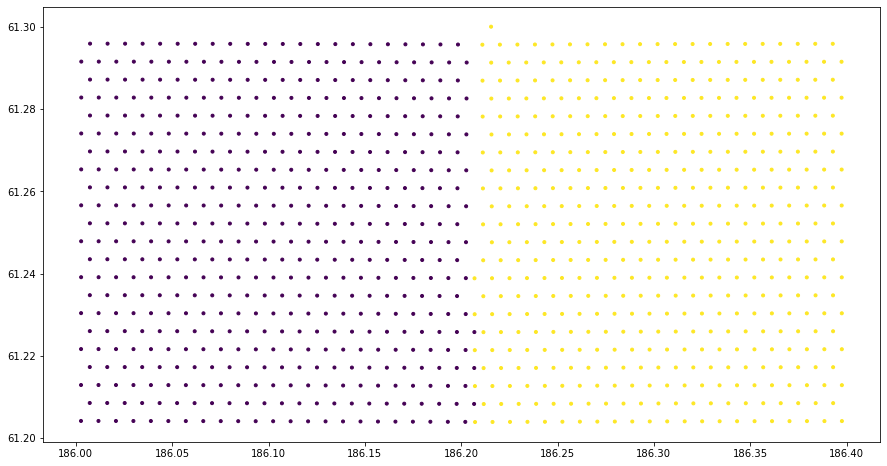

In [26]:
plt.figure(figsize=(15,8))
mask = injected['brickname'] != 0 #== injected['brickname'][0]
unique,index,inverse = np.unique(injected['brickname'],return_index=True,return_inverse=True)
brickid = index[inverse]
mask = (injected['ra'] > 186.0) & (injected['ra'] < 186.4)
mask &= (injected['dec'] > 61.2) & (injected['dec'] < 61.3)
#mask[:] = True
plt.scatter(injected['ra'][mask],injected['dec'][mask],marker='.',c=brickid[mask])

In [27]:
injected = {}
injected['high'] = Table.read('/global/cscratch1/sd/adematti/legacysim/dr9/SV3_density3300/north/file0_rs0_skip0/merged/merged_injected.fits')
injected['low'] = Table.read('/global/cscratch1/sd/adematti/legacysim/dr9/SV3_density100/north/file0_rs0_skip0/merged/merged_injected.fits')
tractor = {}
tractor['high'] = Table.read('/global/cscratch1/sd/adematti/legacysim/dr9/SV3_density3300/north/file0_rs0_skip0/merged/merged_tractor.fits')
tractor['low'] = Table.read('/global/cscratch1/sd/adematti/legacysim/dr9/SV3_density100/north/file0_rs0_skip0/merged/merged_tractor.fits')
tractor['lp'] = Table.read('/global/cscratch1/sd/adematti/legacysim/dr9/SV3_lp/north/file0_rs0_skip0/merged/merged_tractor.fits')

In [28]:
for name,catalog in tractor.items():
    tractor[name] = catalog[custom_imaging_mask(catalog['maskbits'])]

In [29]:
def match_radec(cat1, cat2, distance_upper_bound=0.5/3600.):
    radec1 = [cat1[field] for field in ['ra','dec']]
    radec2 = [cat2[field] for field in ['ra','dec']]
    index = utils.match_ra_dec(radec1,radec2,distance_upper_bound=distance_upper_bound)
    mask = index < radec2[0].size
    return np.flatnonzero(mask),index[mask]

index = {}
for density in ['high','low']:
    index[density] = match_radec(tractor[density],injected[density])[0]
    print(density,index[density].size,len(injected[density]),index[density].size*1./len(injected[density]))

high 9298 10005 0.929335332333833
low 260 278 0.935251798561151


flux_g [-0.02112749 -0.03344792 -0.009857  ]
flux_r [-0.02390565 -0.04648801 -0.01249679]
flux_z [-0.02046634 -0.03259078 -0.00600084]


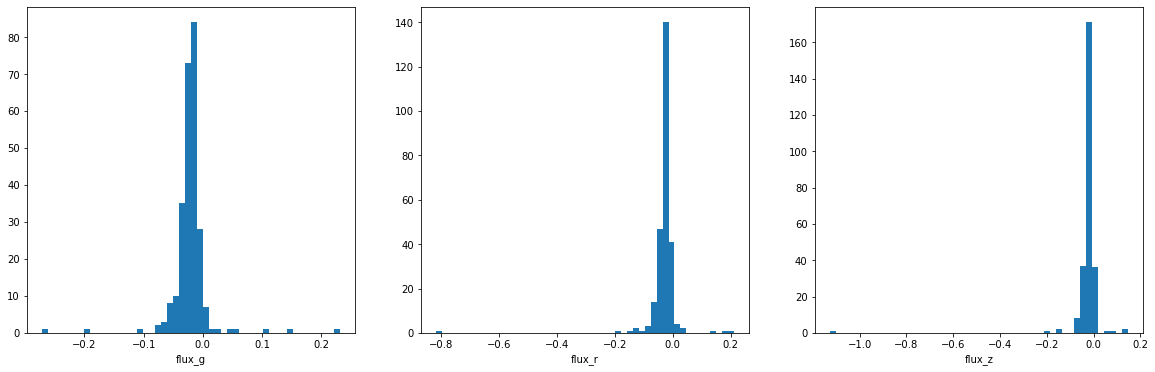

In [30]:
index_low,index_high = match_radec(tractor['low'][index['low']],tractor['high'][index['high']])
low = tractor['low'][index['low']][index_low]
high = tractor['high'][index['high']][index_high]
keys = ['flux_g','flux_r','flux_z']
fig,lax = plt.subplots(ncols=len(keys),sharex=False,sharey=False,figsize=(20,6))
lax = lax.flatten()
for key,ax in zip(keys,lax):
    inverror = np.sqrt(low[key.replace('flux','flux_ivar')])
    diff = (high[key] - low[key])*inverror
    print(key,np.quantile(diff,[0.5,0.16,0.84]))
    ax.hist(diff,bins=50)
    ax.set_xlabel(key)

flux_g [-0.01714038 -0.03685085 -0.00093637]
flux_r [-0.0223429  -0.04748704 -0.00174189]
flux_z [-0.01606435 -0.04189379 -0.00222164]


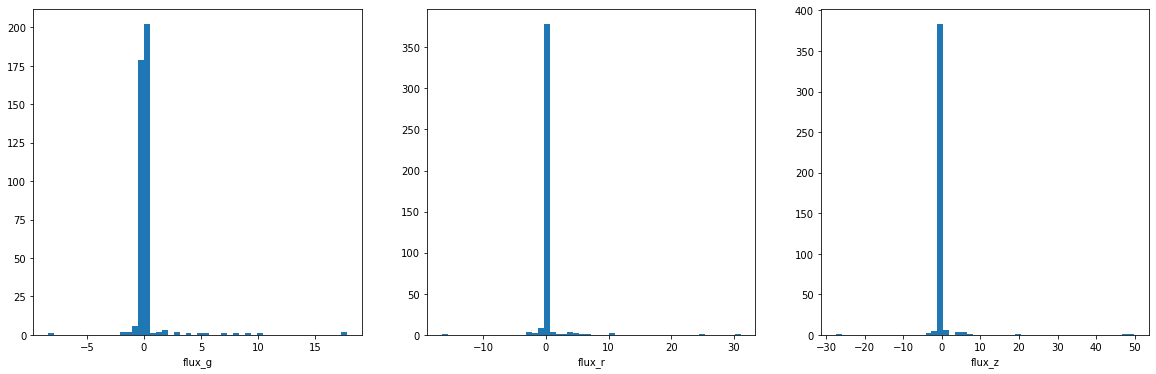

In [31]:
index_lp,index_inlp = {},{}
for density in ['high','low']:
    index_lp[density],index_inlp[density] = match_radec(tractor[density],tractor['lp'],1./3600.)
index_low,index_high = match_radec(tractor['low'][index_lp['low']],tractor['high'][index_lp['high']],1./3600.)
low = tractor['low'][index_lp['low']][index_low]
high = tractor['high'][index_lp['high']][index_high]
keys = ['flux_g','flux_r','flux_z']
fig,lax = plt.subplots(ncols=len(keys),sharex=False,sharey=False,figsize=(20,6))
lax = lax.flatten()
for key,ax in zip(keys,lax):
    inverror = np.sqrt(low[key.replace('flux','flux_ivar')])
    diff = (high[key] - low[key])*inverror
    print(key,np.quantile(diff,[0.5,0.16,0.84]))
    ax.hist(diff,bins=50)
    ax.set_xlabel(key)

flux_g [ 0.00156021 -1.50829659  0.53851833]
flux_r [ 0.00148201 -1.25317127  0.47715681]
flux_z [ 7.19070435e-04 -1.17489414e+00  4.27317524e-01]


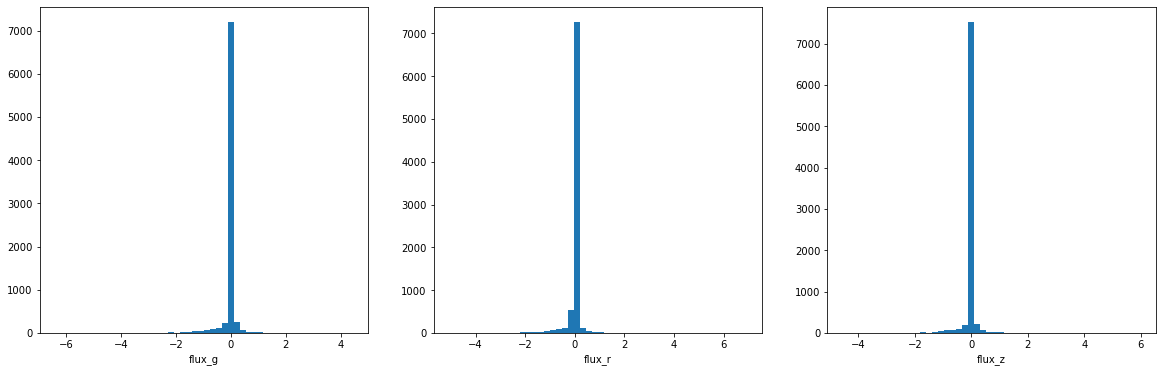

In [42]:
index_lp,index_inlp = {},{}
for density in ['high','low']:
    index_lp[density],index_inlp[density] = match_radec(tractor[density],tractor['lp'],1./3600.)

keys = ['flux_g','flux_r','flux_z']
fig,lax = plt.subplots(ncols=len(keys),sharex=False,sharey=False,figsize=(20,6))
lax = lax.flatten()
density = 'high'
for key,ax in zip(keys,lax):
    diff = utils.flux_to_mag(tractor[density][index_lp[density]][key]) - utils.flux_to_mag(tractor['lp'][index_inlp[density]][key])
    mask = np.isfinite(diff)
    diff = diff[mask]
    print(key,np.quantile(diff,[0.5,0.01,0.99]))
    ax.hist(diff,bins=50)
    ax.set_xlabel(key)

In [32]:
def mask_ts(cat):
    fluxes = {'%sflux' % b:cat['flux_%s' % b]/cat['mw_transmission_%s' % b] for b in ['g','r','z']}
    fluxes['gfiberflux'] = cat['fiberflux_g']/cat['mw_transmission_g']
    masks = isELG_colors(**fluxes)
    return masks[0] | masks[1]

mask_before = mask_ts(tractor['lp'])
for density in ['high','low']:
    mask_after = mask_ts(tractor[density])
    print(density,mask_after[index_lp[density]].sum()/mask_before[index_inlp[density]].sum())

high 1.0771513353115727
low 1.0909090909090908


In [34]:
import fitsio

for name,run in zip(['high','low'],['SV3_density3300','SV3_density100']):
    bxy = np.rint([tractor[name]['by'][index[name]],tractor[name]['bx'][index[name]]]).astype(int)
    bricknames = tractor[name]['brickname'][index[name]]
    for brickname in ['2165p332','2165p340','2165p347']:
        blobs = fitsio.read('/global/cscratch1/sd/adematti/legacysim/dr9/{}/north/file0_rs0_skip0/metrics/{}/blobs-{}.fits.gz'.format(run,brickname[:3],brickname))
        tmp = bxy[:,bricknames==brickname]
        blobid = blobs[tmp[0],tmp[1]]
        print(name,brickname,np.unique(blobid).size*1./blobid.size,blobid.size)

high 2165p332 0.8758064516129033 3100
high 2165p340 0.9305155299391611 3123
high 2165p347 0.9417886178861788 3075
low 2165p332 1.0 89
low 2165p340 1.0 83
low 2165p347 1.0 88


In [ ]:
for name,run in zip(['lp'],['SV3_lp']):
    bxy = np.rint([tractor[name]['by'],tractor[name]['bx']]).astype(int)
    bricknames = tractor[name]['brickname']
    for brickname in ['2165p332','2165p340','2165p347']:
        blobs = fitsio.read('/global/cscratch1/sd/adematti/legacysim/dr9/{}/north/file0_rs0_skip0/metrics/{}/blobs-{}.fits.gz'.format(run,brickname[:3],brickname))
        tmp = bxy[:,bricknames==brickname]
        blobid = blobs[tmp[0],tmp[1]]
        print(name,brickname,np.unique(blobid).size*1./blobid.size,blobid.size)